## Name: Nabeelah Maryam
## Roll No.: 23i-8201
## Applied Computer vision
## Assignment No 1

# All Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

In [12]:
np.set_printoptions(suppress=True)
def create_rotation_matrix(yaw, pitch, roll):
    # Convert angles to radians
    yaw = np.radians(yaw)
    pitch = np.radians(pitch)
    roll = np.radians(roll)
    # Yaw matrix around Y axis
    R_yaw = np.array([
        [np.cos(yaw), 0, np.sin(yaw)],
        [0, 1, 0],
        [-np.sin(yaw), 0, np.cos(yaw)]
    ])
    # Pitch matrix around X axis
    R_pitch = np.array([
        [1, 0, 0],
        [0, np.cos(pitch), -np.sin(pitch)],
        [0, np.sin(pitch), np.cos(pitch)]
    ])

    # Roll matrix around Z axis
    R_roll = np.array([
        [np.cos(roll), -np.sin(roll), 0],
        [np.sin(roll), np.cos(roll), 0],
        [0, 0, 1]
    ])
    # Combine the matrices by multiplying them
    R_combined = R_roll.dot(R_pitch).dot(R_yaw)
    return R_combined


def createGTCameraParameters(focal_length_x,focal_length_y,principal_point_x,principal_point_y,R,camera_translation_vector_from_world_origin):

    #construction of a 4 by 4 Mext
    extrinsic_matrix = np.eye(4) #4 by 4
    extrinsic_matrix[:3, :3] = R  # Transpose of the rotation matrix
    extrinsic_matrix[:3, 3] = -R @ camera_translation_vector_from_world_origin  # Translation in camera coordinates

    # Intrinsic matrix (3 by 4)
    K = np.array([[focal_length_x, 0, principal_point_x,0],
                [0, focal_length_y, principal_point_y,0],
                [0, 0, 1,0]])

    # Camera projection matrix P (3 by 4)
    P = np.dot(K, extrinsic_matrix)

    print("Intrinsic Matrix (K):")
    print(K)
    print("\nExtrinsic Matrix [R|t]:")
    print(extrinsic_matrix)
    print("\nCamera Projection Matrix (P):")
    print(P)

    return P,extrinsic_matrix,K

# Function to project 3D points to 2D image coordinates
def project_world_to_camera(points_3d, P):
    # Add homogeneous coordinate (1) to the 3D points
    points_3d_homogeneous = np.column_stack((points_3d, np.ones((points_3d.shape[0], 1))))

    # Project 3D points to 2D image coordinates
    points_2d_homogeneous = np.dot(P, points_3d_homogeneous.T).T

    # Normalize homogeneous coordinates
    points_2d_normalized = points_2d_homogeneous[:, :2] / points_2d_homogeneous[:, 2:]

    # Check if points are within image boundaries
    points_inside_frame = np.logical_and.reduce((points_2d_normalized[:, 0] >= 0,
                                              points_2d_normalized[:, 0] <= 640,  # Adjust for image width
                                              points_2d_normalized[:, 1] >= 0,
                                              points_2d_normalized[:, 1] <= 480))  # Adjust for image height

    return points_2d_normalized,points_inside_frame


def plotWorldPoints(ax,points,rotation_matrix,camera_origin):

    num_points = len(points)
    # Plot the random points with numbers
    for i in range(num_points,):
        ax.text(points[i, 0], points[i, 1], points[i, 2], str(i+1), color='black', fontsize=8, ha='right', va='bottom')
        ax.scatter(points[i, 0], points[i, 1], points[i, 2], c=[colors[i]], marker='o', s=50)

    # Plot a red cross at the origin
    ax.plot([0], [0], [0], marker='x', markersize=10, color='red')


     # Plot world coordinate axes
    world_axes_length = 1.0
    world_x_axis = np.array([world_axes_length, 0, 0])
    world_y_axis = np.array([0, world_axes_length, 0])
    world_z_axis = np.array([0, 0, 3])

    ax.plot([0, world_x_axis[0]], [0, world_x_axis[1]], [0, world_x_axis[2]], color='green')
    ax.plot([0, world_y_axis[0]], [0, world_y_axis[1]], [0, world_y_axis[2]], color='orange')
    ax.plot([0, world_z_axis[0]], [0, world_z_axis[1]], [0, world_z_axis[2]], color='purple')

    # Add labels 'X', 'Y', and 'Z' at the top of each world axis line
    ax.text(world_x_axis[0], world_x_axis[1], world_x_axis[2], 'X', color='green', fontsize=8, ha='left', va='bottom')
    ax.text(world_y_axis[0], world_y_axis[1], world_y_axis[2], 'Y', color='orange', fontsize=8, ha='left', va='bottom')
    ax.text(world_z_axis[0], world_z_axis[1], world_z_axis[2], 'Z', color='purple', fontsize=8, ha='left', va='bottom')


    # Plot a green cross at the camera origin

    ax.plot([camera_origin[0]], [camera_origin[1]], [camera_origin[2]], marker='x', markersize=10, color='green')

    # Plot camera coordinate axes
    camera_axes_length = 1.0
    camera_x_axis = rotation_matrix[:, 0] * camera_axes_length + camera_origin
    camera_y_axis = rotation_matrix[:, 1] * camera_axes_length + camera_origin
    camera_z_axis = rotation_matrix[:, 2] * 3 + camera_origin

    ax.plot([camera_origin[0], camera_x_axis[0]], [camera_origin[1], camera_x_axis[1]], [camera_origin[2], camera_x_axis[2]], color='blue')
    ax.plot([camera_origin[0], camera_y_axis[0]], [camera_origin[1], camera_y_axis[1]], [camera_origin[2], camera_y_axis[2]], color='cyan')
    ax.plot([camera_origin[0], camera_z_axis[0]], [camera_origin[1], camera_z_axis[1]], [camera_origin[2], camera_z_axis[2]], color='magenta')

    # Add labels 'X', 'Y', and 'Z' at the top of each line
    ax.text(camera_x_axis[0], camera_x_axis[1], camera_x_axis[2], 'X', color='blue', fontsize=8, ha='left', va='bottom')
    ax.text(camera_y_axis[0], camera_y_axis[1], camera_y_axis[2], 'Y', color='cyan', fontsize=8, ha='left', va='bottom')
    ax.text(camera_z_axis[0], camera_z_axis[1], camera_z_axis[2], 'Z', color='magenta', fontsize=8, ha='left', va='bottom')


    # Add grid lines
    ax.grid(True)

    # Set equal scaling to make the plot cubic
    #ax.set_box_aspect([np.ptp(axis) for axis in [ax.get_xlim(), ax.get_ylim(), ax.get_zlim()]])


    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('World Coordinates')


def plotImagePixelPoints(ax,image_points,image_width,image_height):
    num_points = len(image_points)

    # Create a 2D image and plot the projected points
    #fig, ax = plt.subplots()


    ax.set_aspect('equal')

    # Invert y-coordinates to have the origin at the top-left
    image_points[:, 1] = -image_points[:, 1]

    # Plot the red cross at the origin
    ax.plot([0], [0], marker='x', markersize=10, color='red')

    # Plot the projected points with numbers and colors
    for i in range(num_points):
        #ax.text(image_points[i, 0], image_points[i, 1], str(i + 1), color='black', fontsize=8, ha='right', va='bottom')
        #ax.scatter(image_points[i, 0], image_points[i, 1], c=[colors[i]], marker='o', s=50)

        ax.text(image_points[i, 0], image_points[i, 1], str(i + 1), color='black', fontsize=8, ha='right', va='bottom')
        ax.scatter(image_points[i, 0], image_points[i, 1], c=[colors[i]], marker='o', s=50)

    # Set labels
    ax.set_xlabel('U')
    ax.set_ylabel('V')


     # Customize tick labels to remove the minus sign
    ax.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:0.0f}'.format(abs(x))))
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, pos: '{:0.0f}'.format(abs(y))))

    # Set limits based on the image size
    ax.set_xlim(0, image_width)
    ax.set_ylim(-image_height,0)  # Inverted y-axis

    ax.set_title('Camera Coordinates')

    # Show the plot



# Task-1. Run the code by choosing some non-coplanar points such as given below and small rotations (camera_yaw = 3, camera_pitch = 2, camera_roll = 5) (provide plots, and your ground truth projection matrix)

Intrinsic Matrix (K):
[[800.   0. 320.   0.]
 [  0. 700. 240.   0.]
 [  0.   0.   1.   0.]]

Extrinsic Matrix [R|t]:
[[-0.99467026 -0.08885585  0.05230407  1.53940331]
 [-0.08710265  0.99558784  0.0348995  -2.23576435]
 [-0.05517433  0.03015767 -0.9980212  12.02628767]
 [ 0.          0.          0.          1.        ]]

Camera Projection Matrix (P):
[[-813.39199048  -61.43422386 -277.52352325 5079.93470764]
 [ -74.21369291  704.14933053 -215.0954395  1321.27399874]
 [  -0.05517433    0.03015767   -0.9980212    12.02628767]]


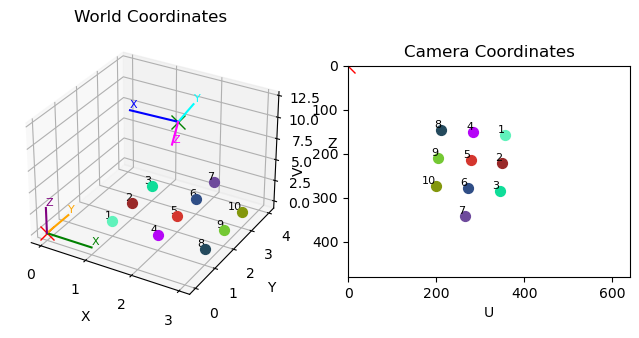

In [13]:
np.random.seed(42)  # for reproducibility

# GT Intrinsic parameters (example values) (#in pixels)
focal_length_x = 800.0
focal_length_y = 700.0
principal_point_x = 320.0
principal_point_y = 240.0
image_width=640
image_height=480
# GT Extrinsic parameters (example values) (#in degree and meters)
camera_yaw = 3 #rotation around Y axis
camera_pitch = 2 #rotation around X axis
camera_roll = 5 #rotation around Z axis
camera_translation_vector_from_world_origin=np.array([2,2,12])  #C translation of camera wrt world (in meters)


camera_rotation_matrix= create_rotation_matrix(camera_yaw, camera_pitch, camera_roll)
#Need to invert X and Z axis to create a forward, right and bottom system to properly project
camera_rotation_matrix[:,0]=-camera_rotation_matrix[:,0]
camera_rotation_matrix[:,2]=-camera_rotation_matrix[:,2]
R=camera_rotation_matrix.T  #for world to camera we need to take inverse of camera rotation


# Hardcoded list of points on the XY plane (just for rendering purpose)
world_3D_points = np.array([[1.0, 1.0, 1.0],
                            [1.0, 2.0, 1.0],
                            [1.0, 3.0, 1.0],
                            [2.0, 1.0, 1.0],
                            [2.0, 2.0, 1.0],
                            [2.0, 3.0, 1.0],
                            [2.0, 4.0, 1.0],
                            [3.0, 1.0, 1.0],
                            [3.0, 2.0, 1.0],
                            [3.0, 3.0, 1.0]], dtype=np.float32)

num_points=len(world_3D_points)
# Assign different colors to each point
colors = np.random.rand(num_points, 3)

#ground truth camera projection matrix
P,RT,K=createGTCameraParameters(focal_length_x,focal_length_y,principal_point_x,principal_point_y,R,camera_translation_vector_from_world_origin)


# Project 3D points to 2D image coordinates
camera_pixel_2D_points,insideViewOrNot = project_world_to_camera(world_3D_points, P)

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(121, projection='3d')  # 1st subplot is 3D
ax2 = fig.add_subplot(122)

#plot 3D points and camera and world axis
plotWorldPoints(ax1,world_3D_points,camera_rotation_matrix,camera_translation_vector_from_world_origin)
#plot 2D points in pixel frame
plotImagePixelPoints(ax2,camera_pixel_2D_points,image_width,image_height)

plt.show(block=True)

# Task-2: create a function for estimating the camera projection matrix using the DLT camera projection algorithm studied in the lecture;

In [14]:


# Function to find the projection matrix from world points to image points
def find_projection_matrix(world_points, image_points):
    # Number of corresponding points
    num_points = len(world_points)

    # Initialize the matrix A
    A = np.zeros((2 * num_points, 12))

    # Fill matrix A using corresponding points
    for i in range(num_points):
        X, Y, Z = world_points[i]  # World points
        u, v = image_points[i]      # Image points

        # Populate rows of A according to linear equation for each corresponding point
        A[2*i, :] = [-X, -Y, -Z, -1, 0, 0, 0, 0, u*X, u*Y, u*Z, u]
        A[2*i + 1, :] = [0, 0, 0, 0, -X, -Y, -Z, -1, v*X, v*Y, v*Z, v]

    # Perform Singular Value Decomposition (SVD) on A to estimate the projection matrix
    _, _, V = np.linalg.svd(A)

    # Extract the estimated projection matrix
    P_estimated = V[-1, :].reshape((3, 4))

    # Normalize the projection matrix
    P_estimated /= P_estimated[2, 3]

    return P_estimated



P_estimated = find_projection_matrix(world_3D_points, camera_pixel_2D_points)

print("\nGround Truth Projection Matrix (P):")
print(P)
print("\nEstimated Projection Matrix (P_estimated):")
print(P_estimated)


Ground Truth Projection Matrix (P):
[[-813.39199048  -61.43422386 -277.52352325 5079.93470764]
 [ -74.21369291  704.14933053 -215.0954395  1321.27399874]
 [  -0.05517433    0.03015767   -0.9980212    12.02628767]]

Estimated Projection Matrix (P_estimated):
[[ 0.  0. -0.  0.]
 [-0. -0. -0.  0.]
 [-0. -0. -1.  1.]]


# Task-3: create a function for extraction all the parameters of camera from the estimated projection matrix using the decomposition method discussed in the class

In [15]:
# Function to decompose the projection matrix into intrinsic and extrinsic parameters
def decompose_projection_matrix(P_estimated):
    # Perform QR decomposition on the inverse of the camera matrix
    R, K_inv = np.linalg.qr(np.linalg.inv(P_estimated[:, :3]))

    # Estimate rotation matrix
    R_estimated = R.T

    # Estimate translation vector
    t_estimated = np.linalg.inv(K_inv) @ P_estimated[:, 3]

    # Compute intrinsic parameters (focal lengths and principal points)
    K_estimated_inv = np.linalg.inv(K_inv)
    fx = 1 / K_estimated_inv[0, 0]
    fy = 1 / K_estimated_inv[1, 1]
    cx = K_estimated_inv[0, 2]
    cy = K_estimated_inv[1, 2]

    return fx, fy, cx, cy, R_estimated, t_estimated, -R[:, 2]


fx, fy, cx, cy, R_estimated, t_estimated, C_estimated = decompose_projection_matrix(P_estimated)

print("\nGround Truth Intrinsic Matrix (K):")
print(K)
print("\nGround Truth Extrinsic Matrix [R|t]:")
print(RT)
print("\nEstimated Intrinsic Matrix (K_estimated):")
print(np.array([[fx, 0, cx], [0, fy, cy], [0, 0, 1]]))
print("\nEstimated Extrinsic Matrix [R_estimated|t_estimated]:")
print(np.hstack((R_estimated, t_estimated.reshape(-1, 1))))



Ground Truth Intrinsic Matrix (K):
[[800.   0. 320.   0.]
 [  0. 700. 240.   0.]
 [  0.   0.   1.   0.]]

Ground Truth Extrinsic Matrix [R|t]:
[[-0.99467026 -0.08885585  0.05230407  1.53940331]
 [-0.08710265  0.99558784  0.0348995  -2.23576435]
 [-0.05517433  0.03015767 -0.9980212  12.02628767]
 [ 0.          0.          0.          1.        ]]

Estimated Intrinsic Matrix (K_estimated):
[[ 1.17557053e+16  0.00000000e+00 -6.31366907e-17]
 [ 0.00000000e+00  1.21172910e+16 -6.08151399e-17]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

Estimated Extrinsic Matrix [R_estimated|t_estimated]:
[[-0.7505824   0.66077686  0.         -0.        ]
 [-0.66077686 -0.7505824   0.         -0.        ]
 [ 0.          0.          1.         -1.        ]]


In [16]:
# Function to project world points to image points using the estimated projection matrix
def project_with_estimated_matrix(world_points, P_estimated):
    # Invert x and z coordinates to match the camera coordinate system
    P_estimated[:, 0] = -P_estimated[:, 0]
    P_estimated[:, 2] = -P_estimated[:, 2]

    # Project world points to camera coordinates using the estimated projection matrix
    camera_pixel_2D_points_estimated, _ = project_world_to_camera(world_points, P_estimated)

    return camera_pixel_2D_points_estimated

# Function to compute the average projection error between original and estimated points
def compute_average_projection_error(original_points, estimated_points):
    num_points = len(original_points)
    errors = np.linalg.norm(original_points - estimated_points, axis=1)
    average_error = np.mean(errors)

    return average_error


camera_pixel_2D_points_estimated = project_with_estimated_matrix(world_3D_points, P_estimated)

average_error = compute_average_projection_error(camera_pixel_2D_points, camera_pixel_2D_points_estimated)
print("\nAverage Projection Error:", average_error)



Average Projection Error: 363.5386787770228


# Task-4 (Bonus): Consider a corner of a room. Place at least 6 marker (or draw some patterns, should beremoveable or otherwise...) . These should be distributed among all three planes (may be two on each of the three planes).

In [17]:
import numpy as np

# Define the number of points
num_points = 6

# Generate random 2D pixel coordinates
camera_points = np.random.randint(0, 1000, size=(num_points, 2))

# Generate random 3D world coordinates
world_points = np.random.rand(num_points, 3) * 500  # Adjust 500 as needed for the range of your coordinates

print("Randomly generated 2D pixel coordinates:")
print(camera_points)
print("\nRandomly generated 3D world coordinates:")
print(world_points)


Randomly generated 2D pixel coordinates:
[[818 646]
 [ 20 840]
 [166 273]
 [387 600]
 [315  13]
 [241 776]]

Randomly generated 3D world coordinates:
[[  7.98312611 115.44691281 120.51273301]
 [341.63175941 304.99832889 416.59745587]
 [ 86.68232675 195.53030379  91.11804389]
 [377.68070516 212.57793725 103.97083143]
 [283.85016391  15.65664623 421.1423873 ]
 [224.87706668 197.575118   463.3294329 ]]


In [18]:
import numpy as np
from numpy.linalg import svd

def normalize(points):
    """Normalize coordinates to have zero mean and unit standard deviation."""
    mean = np.mean(points, axis=0)
    std_dev = np.std(points)
    return (points - mean) / std_dev

# Normalize coordinates
num_points = len(camera_points)
camera_points_norm = normalize(camera_points)
world_points_norm = normalize(world_points)

# Construct the matrix A for linear equation Ax = 0
A = np.zeros((2 * num_points, 12))
for i in range(num_points):
    X, Y, Z = world_points_norm[i]
    x, y = camera_points_norm[i]
    A[2 * i] = np.array([X, Y, Z, 1, 0, 0, 0, 0, -x*X, -x*Y, -x*Z, -x])
    A[2 * i + 1] = np.array([0, 0, 0, 0, X, Y, Z, 1, -y*X, -y*Y, -y*Z, -y])

# Perform Singular Value Decomposition (SVD) on A
_, _, V = svd(A)

# Solution is the last column of V (right singular vector corresponding to the smallest singular value)
P = V[-1].reshape(3, 4)

# Denormalize the projection matrix
T = np.array([[1, 0, -np.mean(camera_points[:, 0])],
              [0, 1, -np.mean(camera_points[:, 1])],
              [0, 0, 1]])
P = np.dot(np.linalg.inv(T), P)

print("Projection matrix (camera parameters):")
print(P)


Projection matrix (camera parameters):
[[ 176.81645275 -140.63976937 -161.87471463   -5.3288861 ]
 [ 285.85220381 -227.89481096 -262.12389572   -9.02875605]
 [   0.54452701   -0.43409152   -0.49902456   -0.01678854]]


In [19]:

def get_camera_position(projection_matrix):
    # Compute the null space of the projection matrix
    _, _, V = np.linalg.svd(projection_matrix)
    null_space_vector = V[-1]

    # Normalize the vector to get the camera center
    camera_center = null_space_vector / null_space_vector[-1]

    return camera_center[:3]

# Get camera position
Cx_est, Cy_est, Cz_est = get_camera_position(P)

print("Estimated camera position from projection matrix:")
print(f"Cx_est: {Cx_est}, Cy_est: {Cy_est}, Cz_est: {Cz_est}")


Estimated camera position from projection matrix:
Cx_est: -0.9723518636086133, Cy_est: 0.34637184086352557, Cz_est: -1.3959582865204412
